<a href="https://colab.research.google.com/github/zoetice/data-science/blob/main/Copy_of_Unit5ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
from scipy.interpolate import PchipInterpolator

# Unit 5 Exercises: Leverage + Practice with GLMs

In these exercises, we'll focus on:
- how to recognize high leverage values, and what to do about them.
- how to decide when a generalized linear model is better than than an all normal, straight line model

We'll start  by looking at the full NBA data set from class, and interogate why I removed so many observations from that data set.

We'll finish with another classic data set, some deemographic data from the Kalahari !Kung San people collected by Nancy Howell in Botswana between August 1967 and May 1969.

##Leverage

Let's take a look at the full basketball data set.

In [2]:
#load the data into a pandas dataframe, and print it
url_basketball = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'
#I could have put the url string directly into pd.read_csv()
basketball = pd.read_csv(url_basketball,dtype={'Pos':'category'})

Before, we put a minutes restriction on what players we looked at, and removed anyone who never missed a free throw.

I've commented out that code, for reference, below. We're going to attempt to run the same analysis without removing any data

In [3]:
#only look at players who played more than 400 minutes
#basketball = basketball.query('MP > 400')
#remove players who never missed a free throw
#basketball = basketball.query('`FT%` != 1.0')

In [4]:
basketball

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01
570,Cody Zeller,C,31,NOP,43,0,320,26,62,0.419,...,48,64,112,39,9,5,16,45,76,zelleco01


**Task1**:

Make a scatter plot with FT% of each player on the horizontal axis and FG% on the vertical axis.

What patterns do you notice?

<Axes: xlabel='FT%', ylabel='FG%'>

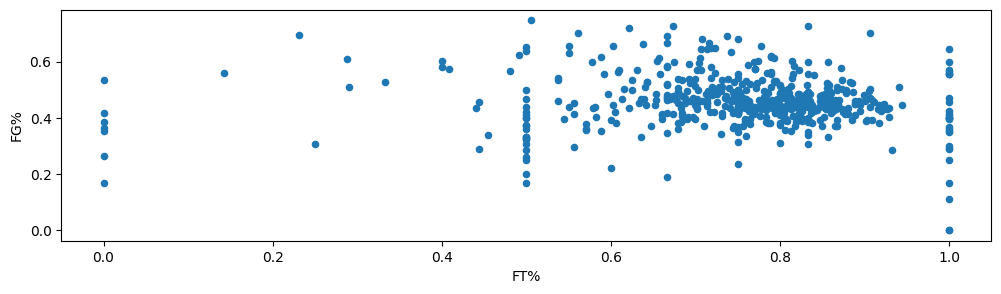

In [5]:
basketball.plot(x="FT%", y="FG%", figsize=(12, 3), kind="scatter")

There are straight verrical lines at 0, .5, and 1. most are betweeb .5 and 1.

**Task2**:

Make a scatter plot with FT% on the horizontal axis and FG% on the vertical axis. Do this for each each Position in the data set.

Pay special attention to the plots for C and PF.

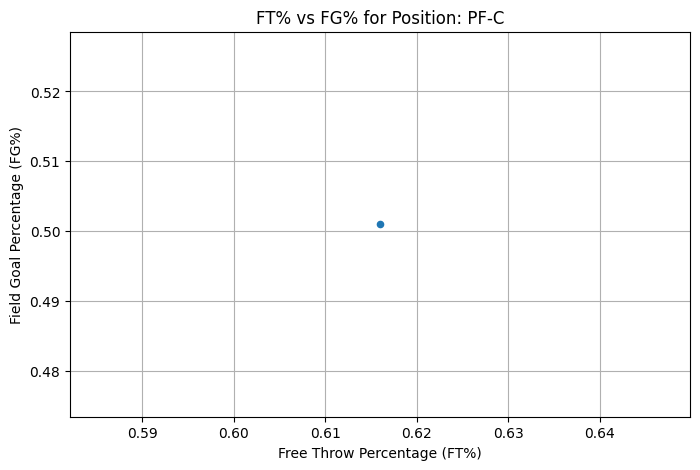

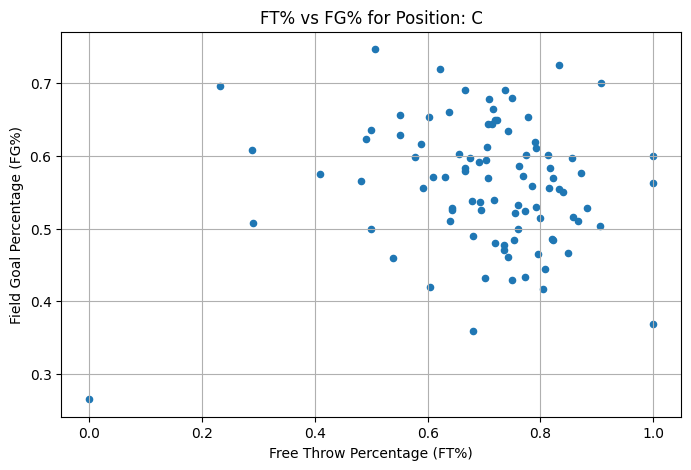

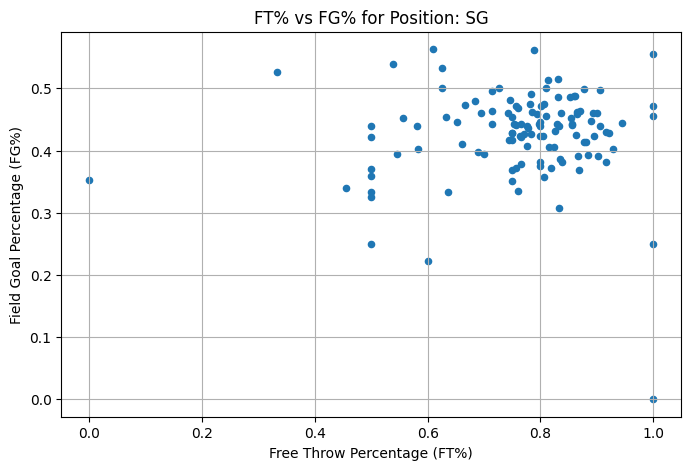

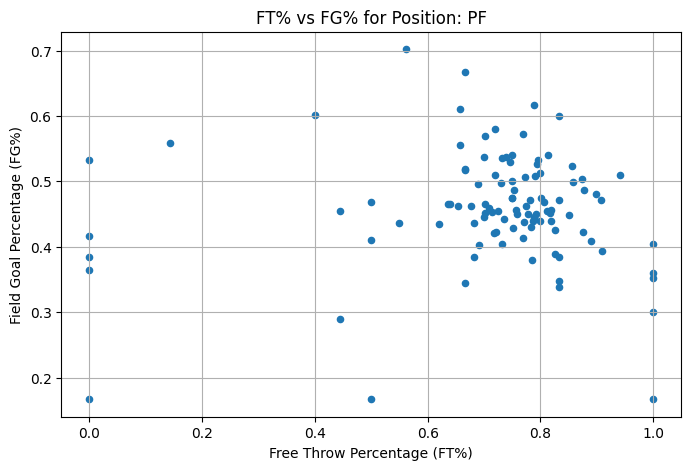

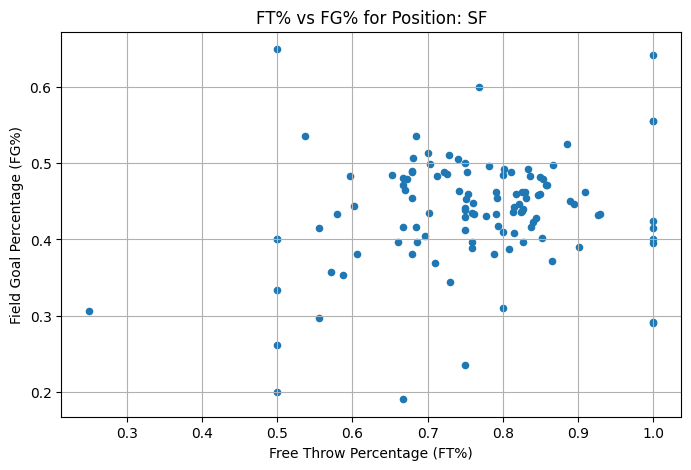

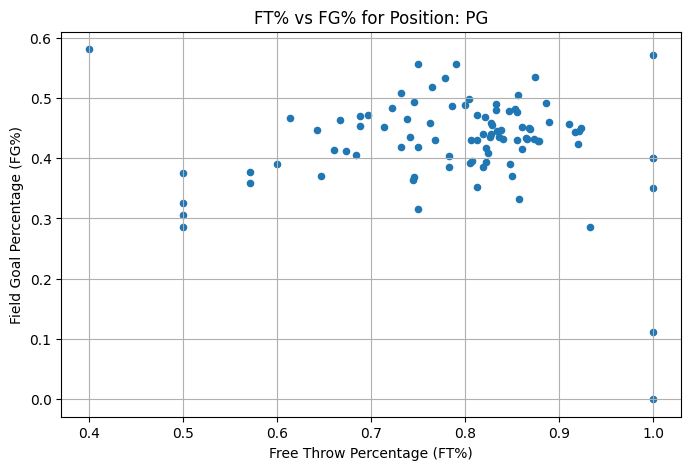

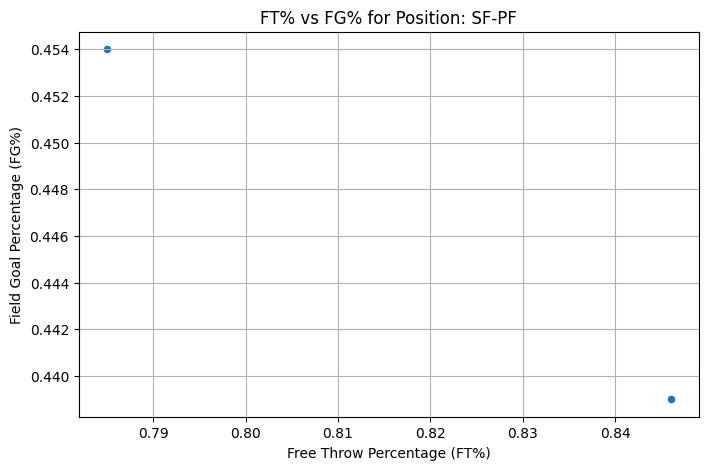

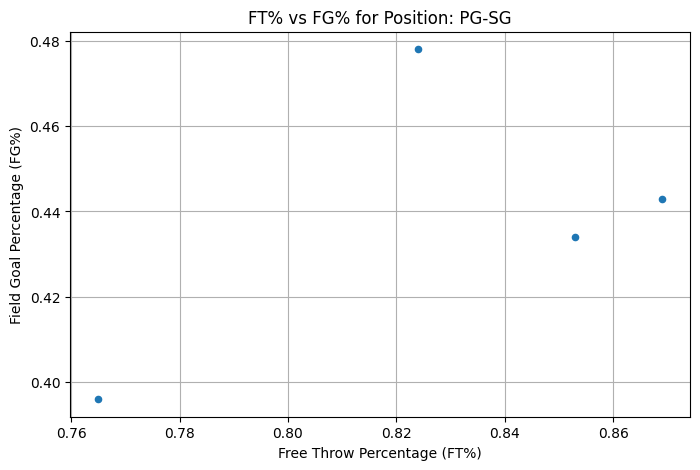

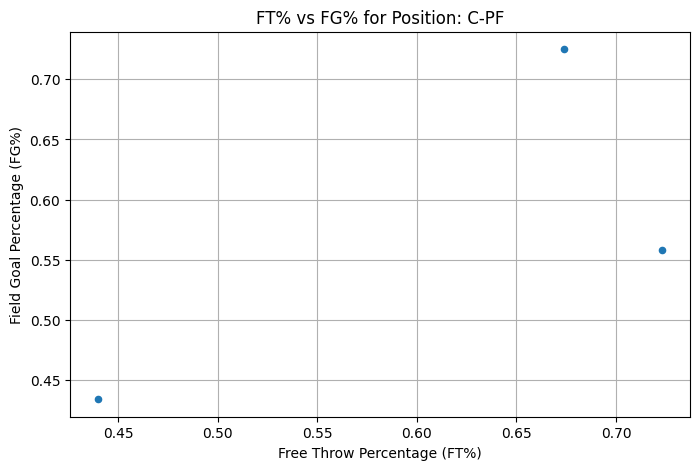

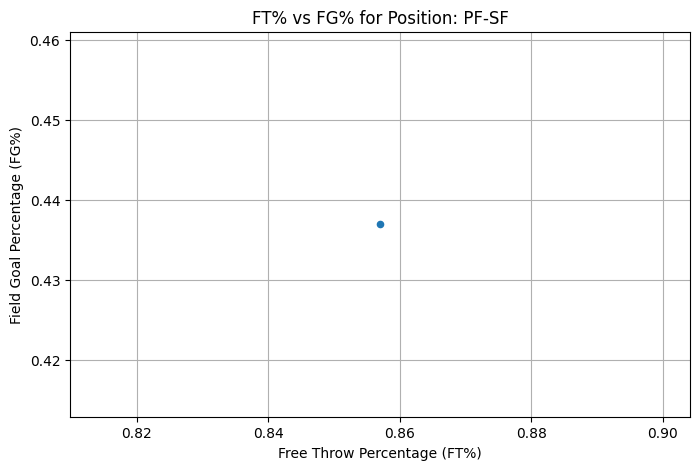

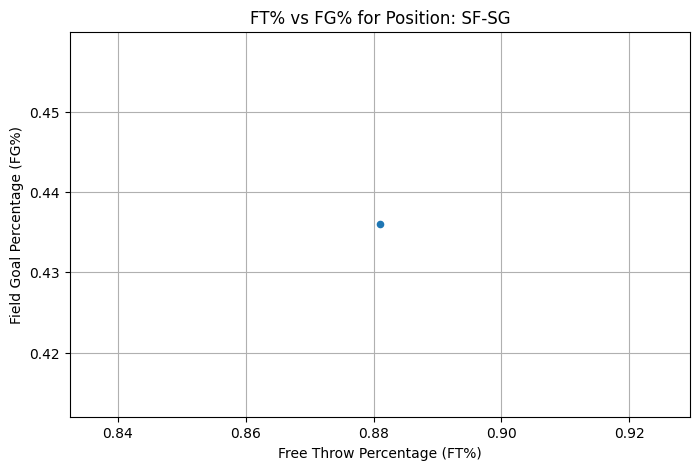

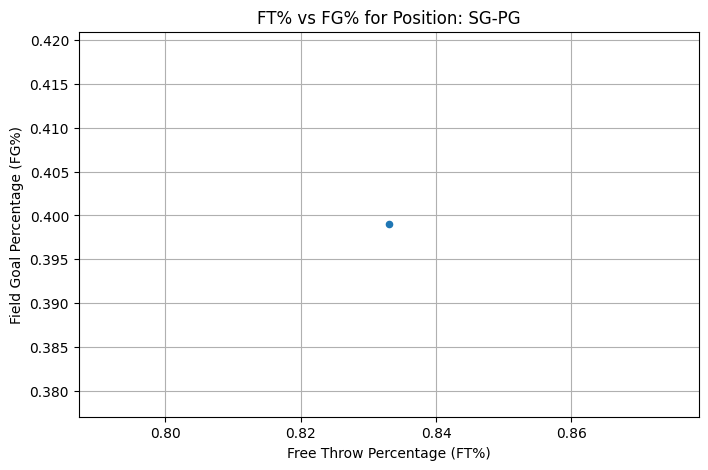

In [10]:
for pos in unique_positions:
    position_df = basketball[basketball['Pos'] == pos]

    ax = position_df.plot(x="FT%", y="FG%", kind="scatter", figsize=(8, 5))
    ax.set_title(f'FT% vs FG% for Position: {pos}')
    ax.set_xlabel('Free Throw Percentage (FT%)')
    ax.set_ylabel('Field Goal Percentage (FG%)')
    plt.grid(True)
    plt.show()

**Task3**:

Originally, I was going to get you to create and run an individual linear regression model for each of the positions.

But I couldn't even get model to run.

Explain why a linear regression model won't run on the full dataset. HInt: look at the graphs you made above, and compare and contrast them to the ones from class.

Or: if you do what I could not and get a linear regression model to run on the full data set, I'll give you full credit and a high five.

there are high leverage points and most players have very few free throws making the linear regression have a harder time running

## From Linear Model to Generalized Linear Model

You'll now fit a linear regression on the height and weight for people or the Kalahari !Kung San people. Height will be the predictor and weight will be the predicted.

Here's the raw data.

In [16]:
#downloads the data from my github
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/howell.csv')

In [17]:
howell

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


**Task4**:

Make a scatter plot of height versus weight for the howell data set.

<Axes: xlabel='height', ylabel='weight'>

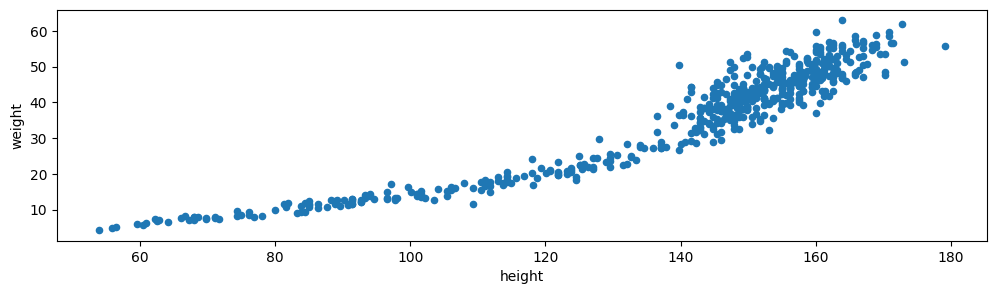

In [18]:
howell.plot(x="height", y="weight", figsize=(12, 3), kind="scatter")

**Task5**:

Create and run a stright line linear regression model on the howell data

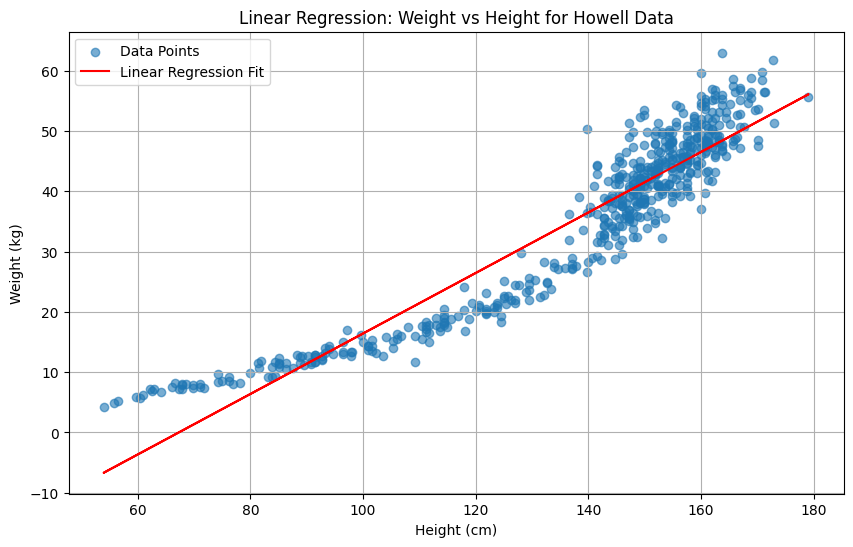

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the predictor (X) and response (y)
X_howell = howell['height']
y_howell = howell['weight']

# Add a constant to the predictor for the intercept
X_howell = sm.add_constant(X_howell)

# Create and fit the OLS model
model_howell = sm.OLS(y_howell, X_howell, missing='drop')
results_howell = model_howell.fit()

# Visualize the model
plt.figure(figsize=(10, 6))
plt.scatter(howell['height'], howell['weight'], label='Data Points', alpha=0.6)
plt.plot(howell['height'], results_howell.predict(X_howell), color='red', label='Linear Regression Fit')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression: Weight vs Height for Howell Data')
plt.legend()
plt.grid(True)
plt.show()

**Task6**:

Run a posterior predictive check for model_howell, plot the posterior predictive distribution, and comment on the fit of the model you made in Task5.

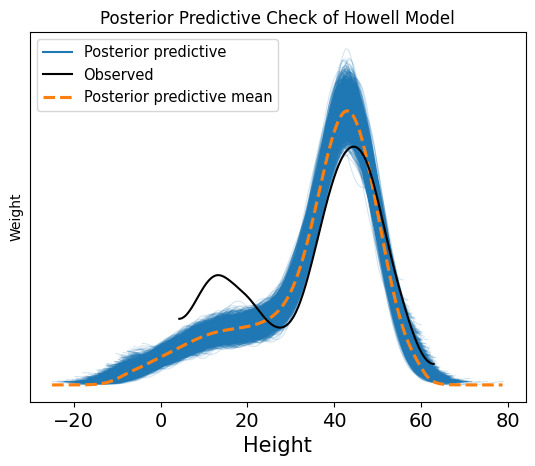

In [35]:
import arviz as az
import matplotlib.pyplot as plt

az.plot_ppc(howell_ppc, data_pairs={'weight': 'weight'})
plt.title('Posterior Predictive Check of Howell Model')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

The model from task five is pretty good - but could be more accurate

**Task7**:

Create and visualize the posterior of a generalized linear model that improves the on the fit of the model you made in Task5.

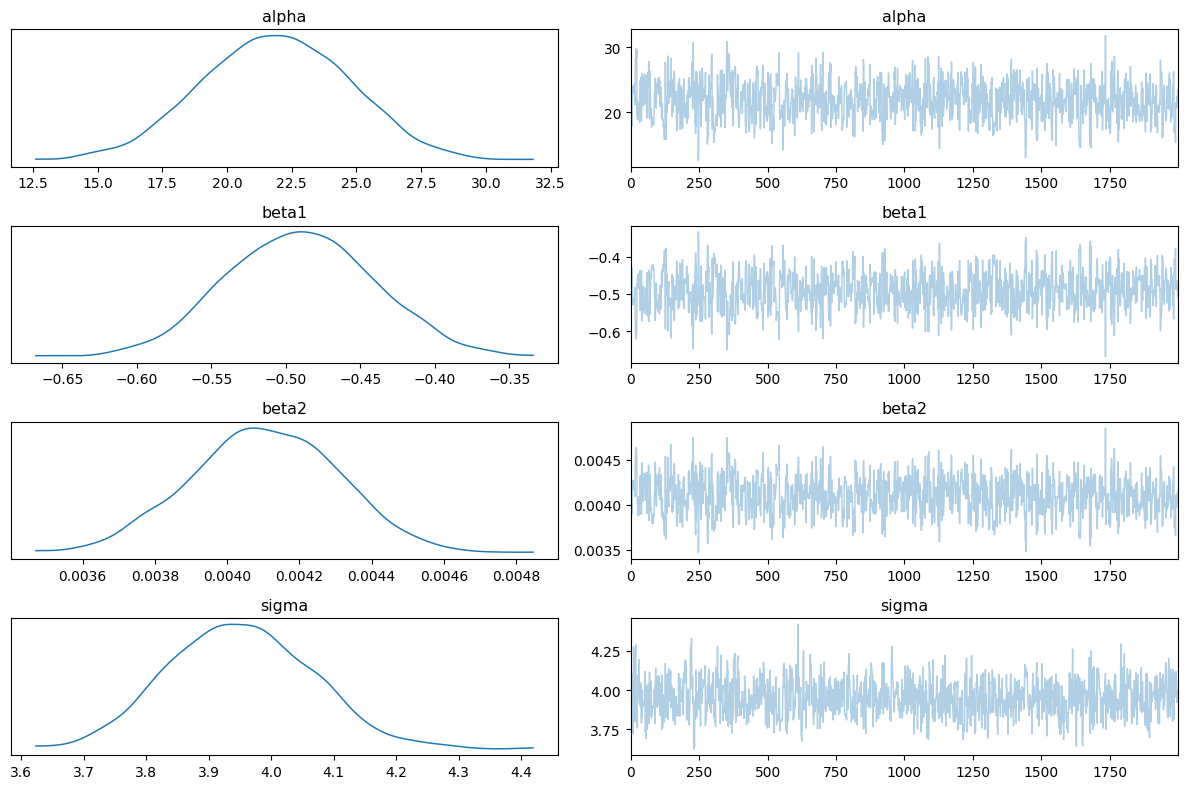

In [54]:
import matplotlib.pyplot as plt
import arviz as az

az.plot_trace(howell_glm_trace)
plt.tight_layout()
plt.show()

**Task8**:

Run a posterior predictive check, and visualize the posterior predictive distribution, for the model you made in Task7.

Comment on the fit.

In [58]:
import arviz as az
import matplotlib.pyplot as plt

In [ ]:

with howell_glm_model:
    howell_glm_ppc = pm.sample_posterior_predictive(howell_glm_trace, extend_inferencedata=True)

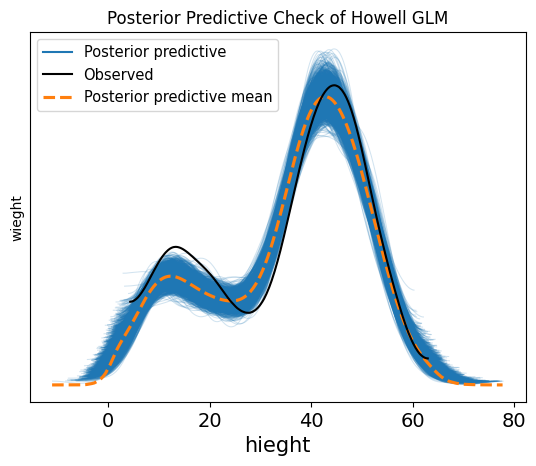

In [61]:


# Visualize the posterior predictive distribution for the GLM
az.plot_ppc(howell_glm_ppc, data_pairs={'weight': 'weight'})
plt.title('Posterior Predictive Check of Howell GLM')
plt.xlabel('hieght')
plt.ylabel('wieght')
plt.show()

this fits much better than the first try and gets the second hump